# Práctica 5: Clasificación Lineal. Perceptron II.

- Grupo 1:
    - Jesús María Matos Torres.
    - Carlos Santana Esplá.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

## Ejercicio 1:  Implementación del método Perceptron

In [7]:
class Perceptron:
    
    def __init__(self, max_iter, mezclar, eta0):
        self.max_iter = max_iter
        self.mezclar = mezclar
        self.eta0 = eta0
        self.w0 = 0
        self.w = np.zeros(2)
        
        
    def ajustar(self, x, y, a, b):
        for i in range(self.max_iter):
            terminar = True
            if self.mezclar:
                self.x, self.y = shuffle(x, y)
            for j in range(len(self.x)):
                f = self.w0 + np.sum(np.multiply(self.w, self.x[j]))
                if self.y[j] == a and f<0:
                    self.w0 = self.w0 + self.eta0
                    self.w = self.w + (np.dot(self.x[j], self.eta0))
                    terminar = False
                if self.y[j] == b and f>=0:
                    self.w0 = self.w0 - self.eta0
                    self.w = self.w - (np.dot(self.x[j], self.eta0))
                    terminar = False
            
            if terminar:
                self.pesos_ = self.w
                self.pesos_umbral_ = self.w0
                return self.pesos_, self.pesos_umbral_
                break
            
        self.pesos_ = self.w
        self.pesos_umbral_ = self.w0
        return self.pesos_, self.pesos_umbral_

    
    def predecir(self, x):
            return np.where(np.dot(x, self.pesos_) + self.pesos_umbral_ >= 0, 1, -1) 

df=pd.read_csv('./datos practicas/Aprendizaje-Automatico-I-main/Practica 4/iris_pca_2d.csv', sep=',')
df1 = df.drop(df[(df['clase'] == 'virginica')].index)
x = df1.iloc[30:70,0:2]
y = df1.iloc[30:70,2]


per = Perceptron(1000, True, 1.0)
per.ajustar(x.to_numpy(), y.to_numpy(), 'setosa', 'versicolor')
per.predecir(x.to_numpy())

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1])

- Creamos la clase Perceptron, la cual inicializamos pasandole un nº de iteraciones máximo, una variable mezclar de tipo booleano y eta0 que es una constante, en este caso 1. Dentro de esta clase implementamos dos métodos:
    - Ajustar: implementamos el algoritmo dado en el guión de prácticas.
    - Pedecir: es el encargado de devolver la clase correspondiente de cada muestra.

## Ejercicio 2: Clasificación con el método Perceptron implementado

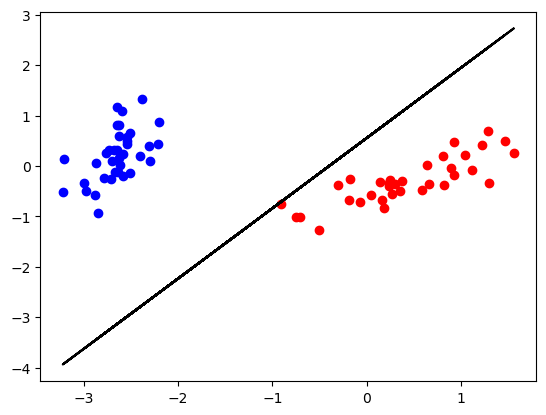

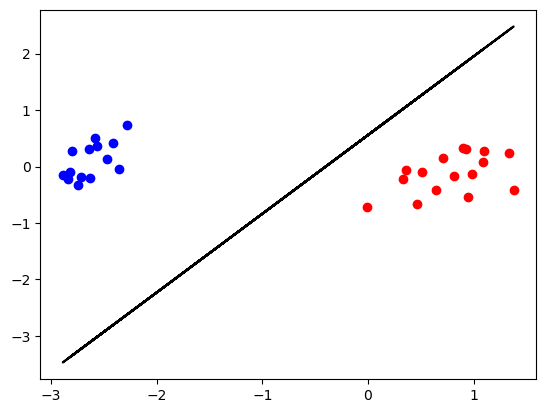

In [8]:
seto_train = []
versi_train = []
df1 = df.drop(df[(df['clase'] == 'virginica')].index)
df1 = df1.to_numpy()
x = df1[:,:-1]
y = df1[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)

per = Perceptron(1000, True, 1.0)


for i in range(len(y_train)):
    if y_train[i] == 'setosa':
        seto_train.append(x_train[i])
    else:
        versi_train.append(x_train[i])
versi_train = np.array(versi_train)
seto_train = np.array(seto_train)

coef_, intercept_ = per.ajustar(x_train, y_train, 'setosa', 'versicolor')
coor_y = (-(coef_[0]/coef_[1])*x_train) - (intercept_/coef_[1])

ax = plt.subplot()
ax.scatter(seto_train[:,:-1], seto_train[:,1], color='blue')
ax.scatter(versi_train[:,:-1], versi_train[:,1], color='red')
ax.plot(x_train, coor_y, color='black')
plt.show()

seto_test = []
versi_test = []

ypred = per.predecir(x_test)

for i in range(len(ypred)):
    if ypred[i] == 1:
        seto_test.append(x_test[i])
    else:
        versi_test.append(x_test[i])
versi_test = np.array(versi_test)
seto_test = np.array(seto_test)

coor_y = (-(coef_[0]/coef_[1])*x_test) - (intercept_/coef_[1])

ax = plt.subplot()
ax.scatter(seto_test[:,:-1], seto_test[:,1], color='blue')
ax.scatter(versi_test[:,:-1], versi_test[:,1], color='red')
ax.plot(x_test, coor_y, color='black')
plt.show()

- Si lo comparamos con las gráficas del ejercicio, en la muestra conjunta de setosa y versicolor, vemos que sigue una disperción parecida, teniendo en cuenta que cada iteración de cada ejercicio, la mezcla de las muestras es totalmente aleatoria y sin correlación.

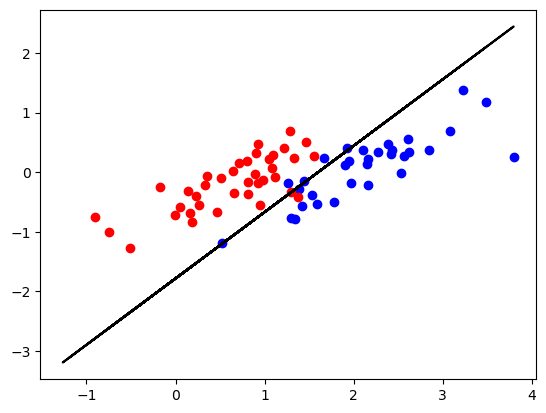

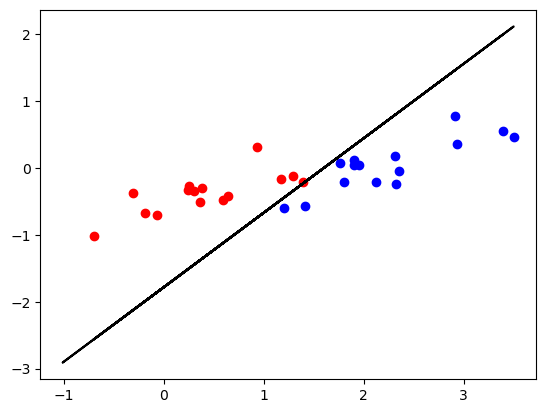

In [9]:
virgi_train = []
versi_train = []
df1 = df.drop(df[(df['clase'] == 'setosa')].index)
df1 = df1.to_numpy()
x = df1[:,:-1]
y = df1[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)

per = Perceptron(1000, True, 1.0)


for i in range(len(y_train)):
    if y_train[i] == 'virginica':
        virgi_train.append(x_train[i])
    else:
        versi_train.append(x_train[i])
versi_train = np.array(versi_train)
virgi_train = np.array(virgi_train)

coef_, intercept_ = per.ajustar(x_train, y_train, 'virginica', 'versicolor')
coor_y = (-(coef_[0]/coef_[1])*x_train) - (intercept_/coef_[1])

ax = plt.subplot()
ax.scatter(virgi_train[:,:-1], virgi_train[:,1], color='blue')
ax.scatter(versi_train[:,:-1], versi_train[:,1], color='red')
ax.plot(x_train, coor_y, color='black')
plt.show()

virgi_test = []
versi_test = []

ypred = per.predecir(x_test)

for i in range(len(ypred)):
    if ypred[i] == 1:
        virgi_test.append(x_test[i])
    else:
        versi_test.append(x_test[i])
versi_test = np.array(versi_test)
virgi_test = np.array(virgi_test)

coor_y = (-(coef_[0]/coef_[1])*x_test) - (intercept_/coef_[1])

ax = plt.subplot()
ax.scatter(virgi_test[:,:-1], virgi_test[:,1], color='blue')
ax.scatter(versi_test[:,:-1], versi_test[:,1], color='red')
ax.plot(x_test, coor_y, color='black')
plt.show()

- En este caso, con las muestras virginica y versicolor, observamos que a la hora de predecir, nuestro método predecir es más preciso, esto se puede comprobar con la línea que trasamos entre las dos clases, para este ejemplo.

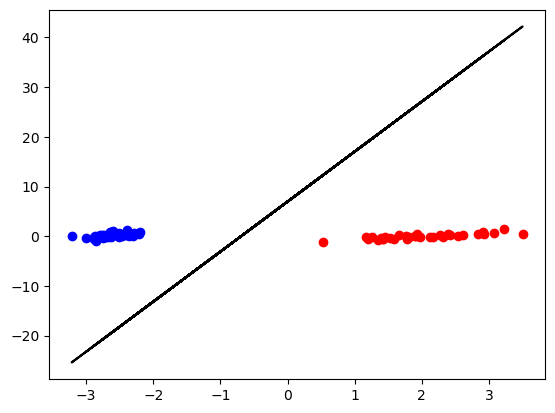

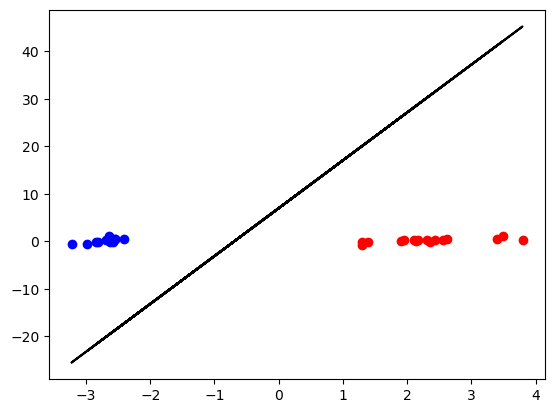

In [10]:
seto_train = []
virgi_train = []
df1 = df.drop(df[(df['clase'] == 'versicolor')].index)
df1 = df1.to_numpy()
x = df1[:,:-1]
y = df1[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)

per = Perceptron(1000, True, 1.0)


for i in range(len(y_train)):
    if y_train[i] == 'setosa':
        seto_train.append(x_train[i])
    else:
        virgi_train.append(x_train[i])
virgi_train = np.array(virgi_train)
seto_train = np.array(seto_train)

coef_, intercept_ = per.ajustar(x_train, y_train, 'setosa', 'virginica')
coor_y = (-(coef_[0]/coef_[1])*x_train) - (intercept_/coef_[1])

ax = plt.subplot()
ax.scatter(seto_train[:,:-1], seto_train[:,1], color='blue')
ax.scatter(virgi_train[:,:-1], virgi_train[:,1], color='red')
ax.plot(x_train, coor_y, color='black')
plt.show()

seto_test = []
virgi_test = []

ypred = per.predecir(x_test)

for i in range(len(ypred)):
    if ypred[i] == 1:
        seto_test.append(x_test[i])
    else:
        virgi_test.append(x_test[i])
virgi_test = np.array(virgi_test)
seto_test = np.array(seto_test)

coor_y = (-(coef_[0]/coef_[1])*x_test) - (intercept_/coef_[1])

ax = plt.subplot()
ax.scatter(seto_test[:,:-1], seto_test[:,1], color='blue')
ax.scatter(virgi_test[:,:-1], virgi_test[:,1], color='red')
ax.plot(x_test, coor_y, color='black')
plt.show()

- Por último, con la mezcla de muestras entre setosa y virginica, al compararla con el ejercicio 4, vemos que la distribución que sigue la muestra es muy diferentes, estando esta los puntos muy concentrados.